In [1]:
from data_builder import DataBuilder

In [2]:
data_builder = DataBuilder()

In [3]:
data_builder.load_training_data('H:/data/example.pt')

Loaded 96 data points!


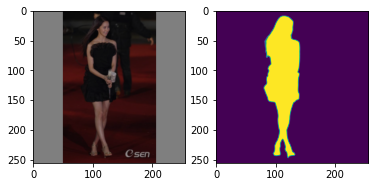

In [12]:
data_builder.show_data_point(15)

In [13]:
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [15]:
# this can be installed by:
# pip install git+https://github.com/liruilong940607/human_det --upgrade
from human_det import Detection

In [16]:
# this can be installed by:
# pip install git+https://github.com/qubvel/segmentation_models.pytorch --upgrade
import segmentation_models_pytorch as smp

In [17]:
class Segmentation(nn.Module):
    def __init__(self, ckpt=None, device="cuda:0"):
        super().__init__()
        self.device = device
        self.model = smp.Unet(
            'resnet18',
            encoder_weights='imagenet',
            classes=2,
        ).to(device)
        self.det_engine = Detection(device=device)
        
        if ckpt is not None and os.path.exists(ckpt):
            print("loading ckpt from:", ckpt)
            self.model.load_state_dict(torch.load(ckpt))

# 